# ipywidgets working samples

## Example 1 : df explorer

In [ ]:
# simple df explorer
@interact
def show_articles_more_than(column=['claps', 'views', 'fans', 'reads'],
                            x=(10, 100000, 10)):
    return df.loc[df[column] > x]
 

## Level 1 image browser

In [ ]:
# simple image reader
@interact
def show_images(file=os.listdir('images/')):
    display(Image(fdir+file))
 

## level 2 image browser

In [ ]:
# Create widgets
directory = widgets.Dropdown(options=['images', 'nature', 'assorted'])
images = widgets.Dropdown(options=os.listdir(directory.value))
 
# Updates the image options based on directory value
def update_images(*args):
    images.options = os.listdir(directory.value)

# Tie the image options to directory value
directory.observe(update_images, 'value')
 
# Show the images
def show_images(fdir, file):
    display(Image(f'{fdir}/{file}'))

_ = interact(show_images, fdir=directory, file=images)
 

## dependent widgets example

In [ ]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)
 
def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')
 
def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);
 

## matplotlib lib example

In [ ]:
%matplotlib notebook
from ipywidgets import HBox, Button
from IPython.display import display
from matplotlib import pyplot as plt
 
red = Button(description='Make Red')
green = Button(description='Make Green')
 
fig, ax = plt.subplots()
ax.plot([1,2,3])
 
def make_red(button):
    ax.lines[0].set_color('red')
    ax.figure.canvas.draw()

def make_green(button):
    ax.lines[0].set_color('green')
    ax.figure.canvas.draw()

red.on_click(make_red)
green.on_click(make_green)
display(HBox([red, green]))
 
 
 

## astro https://github.com/JuanCab/AstroInteractives/blob/master/Interactives/SmallAngleEquation.ipynb

In [2]:
import ipywidgets as widgets
import numpy as np
import bqplot.pyplot as bq
from IPython.display import display

def approx_theta(s,d):
    # Small angle approximation equation
    return s/d

def exact_theta(s,d):
    # Exact equation for theta
    return 2*np.arctan(s/(2*d))

def circle(r,d=0.):
    # Creates a circle given a radius r and displacement along the 
    # x-axis d 
    theta = np.linspace(0,2*np.pi,1000)
    return (r*np.cos(theta)+d,r*np.sin(theta))

def par_circ(r,theta0,theta1,d=0.,h=0.):
    theta = np.linspace(theta0,theta1,1000)
    return (r*np.cos(theta)+d,r*np.sin(theta)+h)

def ellipse(a,b,d=0.):
    # Creates an ellipse centered at (d,0) with a semimajor axis of 'a'
    # in the x direction and 'b' in the y direction
    theta = np.linspace(0,2*np.pi,1000)
    return (a*np.cos(theta)+d,b*np.sin(theta))

def update(change=None):
    # Update the display.
    D1.y = [0,h_slider.value/2]
    D2.y = [0,-h_slider.value/2]
    D1.x = [0,d_slider.value]
    D2.x = [0,d_slider.value]
    ref.x = [0,d_slider.value]
    # Note that the ellipse is used so that the display needn't be a square.
    X_new, Y_new = circle(h_slider.value/2, d_slider.value)
    Object.x = X_new
    Object.y = Y_new
    
    # Update the resulting angles
    theta_approx = 180/np.pi*approx_theta(h_slider.value,d_slider.value)
    theta_exact = 180/np.pi*exact_theta(h_slider.value,d_slider.value)
    
    approx_eqn.value='<p><b>"Small Angle"  Equation:</b> <br/> {:.5f}&deg; = (180&deg;/&pi;) * ({} / {})</p>'.format(theta_approx,h_slider.value,d_slider.value)
    exact_eqn.value ='<p><b>"Exact" Equation:</b> <br/> {:.5f}&deg; = 2 arctan( {} / 2*{} )</p>'.format(theta_exact,h_slider.value,d_slider.value)    
    difference_eqn.value='<p><b>Difference:</b> <br/> {:.5f}&deg; ({:.2f}%)</p>'.format(abs(theta_exact-theta_approx), 100*(abs(theta_exact-theta_approx)/theta_exact))
    
    arc_loc = (d_slider.value - h_slider.value/2)/3
    angle_loc = exact_theta(h_slider.value,d_slider.value)/2
    xc,yc = par_circ(r=arc_loc, theta0=2*np.pi-angle_loc, theta1=2*np.pi+angle_loc)

    angle_ex.x = xc
    angle_ex.y = yc
    
h_slider = widgets.FloatSlider(
    value=5,
    min=0.1,
    max=30.05,
    step=0.1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
d_slider = widgets.FloatSlider(
    value=50,
    min=20.,
    max=100,
    step=0.1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
)

theta_approx = 180/np.pi*approx_theta(h_slider.value,d_slider.value)
theta_exact = 180/np.pi*exact_theta(h_slider.value,d_slider.value)

# Create labels for sliders
h_label = widgets.Label(value='Size of star (s)')
d_label = widgets.Label(value='Distance to star (d)')

# Create text display
approx_eqn = widgets.HTML(value='<p><b>"Small Angle" Equation:</b> <br/> {:.5f}&deg; = (180&deg;/&pi;) * ({} / {})</p>'.format(theta_approx,h_slider.value,d_slider.value))
exact_eqn = widgets.HTML(value='<p><b>"Exact" Equation:</b> <br/> {:.5f}&deg; = 2 arctan( {} / 2*{} )</p>'.format(theta_exact,h_slider.value,d_slider.value))
difference_eqn = widgets.HTML(value='<p><b>Difference:</b> <br/> {:.5f}&deg; ({:.2f}%)</p>'.format(abs(theta_exact-theta_approx), 100*(abs(theta_exact-theta_approx)/theta_exact)))
                             
blank = widgets.Label(value='')

## PLOT/FIGURE ##

# Sets axis scale for x and y to 
sc_x = bq.LinearScale(min=-5,max=115)
sc_y = bq.LinearScale(min=-26,max=26)

# Get the range to work with
x_range = sc_x.max - sc_x.min
y_range = sc_y.max - sc_y.min

# Initial height and distance of star
init_h = h_slider.value
init_d = d_slider.value

# Note that the ellipse is used so that the display needn't be a square.
# Creates a circular 'star'
X,Y = circle(r=init_h/2, d=init_d)

# Sets up the axes, grid-lines are set to black so that they blend in with the background.
ax_x = bq.Axis(scale=sc_x, grid_color='white', num_ticks=0)
ax_y = bq.Axis(scale=sc_y, orientation='vertical', grid_color='white', num_ticks=0)

# Draws the lines to the top and bottom of the star respectively
D1 = bq.Lines(x=[0,init_d], y=[0,init_h/2], scales={'x': sc_x, 'y': sc_y}, colors=['white'])
D2 = bq.Lines(x=[0,init_d], y=[0,-init_h/2], scales={'x': sc_x, 'y': sc_y}, colors=['white'])

# Creates the star
Object = bq.Lines(scales={'x': sc_x, 'y': sc_y}, x=X, y=Y, colors=['blue'], 
                  fill='inside', fill_colors=['blue'])

# Creates a reference line.
ref = bq.Lines(x=[0,init_d], y=[0,0], scales={'x': sc_x, 'y': sc_y}, colors=['white'], line_style='dashed')

arc_loc = (init_d - init_h/2)/3
angle_loc = exact_theta(init_h,init_d)/2
xc,yc = par_circ(r=arc_loc, theta0=2*np.pi-angle_loc, theta1=2*np.pi+angle_loc)

angle_ex = bq.Lines(x=xc, y=yc, scales={'x': sc_x, 'y': sc_y}, colors=['white'])

angle_label = bq.Label(x=[2], y=[0], scales={'x': sc_x, 'y': sc_y},
                   text=[r'$$\theta$$'], default_size=15, font_weight='bolder',
                   colors=['white'], update_on_move=False)

# Update the the plot/display
h_slider.observe(update, names=['value'])
d_slider.observe(update, names=['value'])

# Creates the figure. The background color is set to black so that it looks like 'space.' Also,
# removes the default y padding.
fig = bq.Figure(title='Small Angle Approximation', marks=[Object,D1,D2,angle_ex], axes=[ax_x, ax_y], 
                padding_x=0, padding_y=0, animation=100, background_style={'fill' : 'black'})

# Display to the screen

# Set up the figure
fig_width = 750
fig.layout.width = '{:.0f}px'.format(fig_width)
fig.layout.height = '{:.0f}px'.format(fig_width/2)

# Set up the bottom part containing the controls and display of equations
h_box = widgets.VBox([h_label, h_slider])
d_box = widgets.VBox([d_label, d_slider])
slide_box = widgets.HBox([h_box, d_box])
h_box.layout.width = '{:.0f}px'.format(fig_width/2)
d_box.layout.width = '{:.0f}px'.format(fig_width/2)

eqn_box = widgets.HBox([exact_eqn, approx_eqn, difference_eqn])
exact_eqn.layout.width = '{:.0f}px'.format(fig_width/3)
approx_eqn.layout.width = '{:.0f}px'.format(fig_width/3)
difference_eqn.layout.width = '{:.0f}px'.format(fig_width/3)

BOX = widgets.VBox([fig, slide_box, eqn_box])
display(BOX)

## plotly + cufflinks (https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)

In [3]:
import cufflinks as cf

@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

ModuleNotFoundError: No module named 'cufflinks'

https://kapernikov.com/ipywidgets-with-matplotlib/

In [10]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 

def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 

@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

In [12]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

## link widget properties

In [13]:
sl1 = widgets.IntSlider(description='slider 1', min=0, max=10)
sl2 = widgets.IntSlider(description='slider 2', min=0, max=10)
 
link = widgets.link(
    (sl1, 'value'), 
    (sl2, 'min')
)
 
sl1.value = 5
widgets.VBox([sl1, sl2])

In [18]:
output = widgets.Output()
 
# create some x data
x = np.linspace(0, 2 * np.pi, 100)
 
# default line color
initial_color = '#FF00DD'
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(x, np.sin(x), initial_color)


# create some control elements
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq')
color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
 
# callback functions
def update(change):
    """redraw line (update plot)"""
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
def line_color(change):
    """set line color"""
    line.set_color(change.new)
     
def update_xlabel(change):
    ax.set_xlabel(change.new)
     
def update_ylabel(change):
    ax.set_ylabel(change.new)

# connect callbacks and traits
int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')
 
text_xlabel.value = 'x'
text_ylabel.value = 'y'

controls = widgets.VBox([int_slider, color_picker, text_xlabel, text_ylabel])
widgets.HBox([controls, output])

In [19]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

class Sines(widgets.HBox):
     
    def __init__(self):
        super().__init__()
        output = widgets.Output()
 
        self.x = np.linspace(0, 2 * np.pi, 100)
        initial_color = '#FF00DD'
 
        with output:
            self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=(5, 3.5))
        self.line, = self.ax.plot(self.x, np.sin(self.x), initial_color)
         
        self.fig.canvas.toolbar_position = 'bottom'
        self.ax.grid(True)
 
        # define widgets
        int_slider = widgets.IntSlider(
            value=1, 
            min=0, 
            max=10, 
            step=1, 
            description='freq'
        )
        color_picker = widgets.ColorPicker(
            value=initial_color, 
            description='pick a color'
        )
        text_xlabel = widgets.Text(
            value='', 
            description='xlabel', 
            continuous_update=False
        )
        text_ylabel = widgets.Text(
            value='', 
            description='ylabel', 
            continuous_update=False
        )
 
        controls = widgets.VBox([
            int_slider, 
            color_picker, 
            text_xlabel, 
            text_ylabel
        ])
        controls.layout = make_box_layout()
         
        out_box = widgets.Box([output])
        output.layout = make_box_layout()
 
        # observe stuff
        int_slider.observe(self.update, 'value')
        color_picker.observe(self.line_color, 'value')
        text_xlabel.observe(self.update_xlabel, 'value')
        text_ylabel.observe(self.update_ylabel, 'value')
         
        text_xlabel.value = 'x'
        text_ylabel.value = 'y'
         
 
        # add to children
        self.children = [controls, output]
     
    def update(self, change):
        """Draw line in plot"""
        self.line.set_ydata(np.sin(change.new * self.x))
        self.fig.canvas.draw()
 
    def line_color(self, change):
        self.line.set_color(change.new)
 
    def update_xlabel(self, change):
        self.ax.set_xlabel(change.new)
 
    def update_ylabel(self, change):
        self.ax.set_ylabel(change.new)

Sines()

Sines(children=(VBox(children=(IntSlider(value=1, description='freq', max=10), ColorPicker(value='#FF00DD', de…

Sines(children=(VBox(children=(IntSlider(value=1, description='freq', max=10), ColorPicker(value='#FF00DD', de…

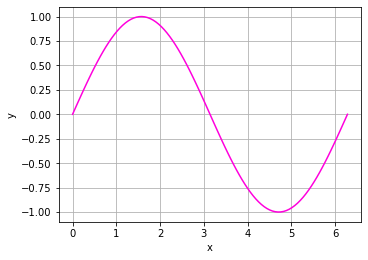

In [23]:
Sines()

http://www.xavierdupre.fr/app/jyquickhelper/helpsphinx/notebooks/custom_widget.html

In [21]:
%matplotlib inline
import ipywidgets
import matplotlib.pyplot as plt

import networkx as nx

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

ipywidgets.interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
         generator={
             'lobster': random_lobster,
             'power law': powerlaw_cluster,
             'Newman-Watts-Strogatz': newman_watts_strogatz,
             'Erdős-Rényi': erdos_renyi,
         });



interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…

## https://github.com/jupyter-widgets/tutorial/blob/99fe57804316d6ad2b8c08fd91657a5f0155d606/notebooks/05.04-OPTIONAL-Widget_Events_2--Separating_concerns,_object_oriented.ipynb

In [9]:
import traitlets
import ipywidgets as widgets

class PassGenGUI(widgets.VBox):
    def __init__(self):
        # Do NOT forgot to do this!
        super(PassGenGUI, self).__init__()
        
        # Define each of the children...
        self._helpful_title = widgets.HTML('Generated password is:')
        self._password_text = widgets.HTML('No password yet', placeholder='No password generated yet')
        self._password_text.layout.margin = '0 0 0 20px'
        self._password_length = widgets.IntSlider(description='Length of password',
                                                  min=8, max=20,
                                                  style={'description_width': 'initial'})
        children = [self._helpful_title, self._password_text, self._password_length]
        self.children = children

    # Add value as a read-only property
    @property
    def value(self):
        return self._password_text.value

class PassGenLogic(traitlets.HasTraits):
    length = traitlets.Integer()
    password = traitlets.Unicode()
    
    def __init__(self):
        super(PassGenLogic, self).__init__()
            
    @traitlets.observe('length')
    def calculate_password(self, change):
        import string
        import secrets
    
        new_password = ''.join(secrets.choice(string.ascii_letters) for _ in range(self.length))
        
        # Set the value of the password trait here:
        self.password = new_password

    # The new validator:
    @traitlets.validate('length')
    # You can name this method anything you want.
    def _validate_length(self, proposal):
        # proposal contains the new value
        length = proposal['value']
        
        # Test the value
        if length < 1:
            # if it is a bad value, raise a TraitError
            raise traitlets.TraitError('Password length should be positive.')
        # If the value is good, return it.
        return proposal['value']

# By subclassing from PassGenGUI we ensure PassGen behaves as a widget, since
# PassGenGUI subclasses from ipywidgets.VBox

class PassGen(PassGenGUI):
    def __init__(self):
        # Set up all of the subwidgets like _passwordd)text
        super(PassGen, self).__init__()
        
        # Create an instance of our model.
        self.model = PassGenLogic()
        
        # Link the password from the model to the _password_text widget
        traitlets.link((self.model, 'password'), (self._password_text, 'value'))
        
        # Link the _password_length widget to the length in the model
        traitlets.link((self.model, 'length'), (self._password_length, 'value'))
        
        
password_widget = PassGen()
password_widget



PassGen(children=(HTML(value='Generated password is:'), HTML(value='', layout=Layout(margin='0 0 0 20px'), pla…

# Widget library

## ipysheet
 - ipywidgets example : ipysheet : https://towardsdatascience.com/interactive-spreadsheets-in-jupyter-32ab6ec0f4ff

In [1]:
import numpy as np
from ipysheet import from_array, to_array

arr = np.random.randn(6, 10)

sheet = from_array(arr)
sheet



Sheet(cells=(Cell(column_end=9, column_start=0, row_end=5, row_start=0, squeeze_column=False, squeeze_row=Fals…

In [2]:
arr = np.array([True, False, True])

sheet = from_array(arr)
sheet

Sheet(cells=(Cell(column_end=0, column_start=0, numeric_format=None, row_end=2, row_start=0, squeeze_row=False…

In [3]:
to_array(sheet)

array([[ True],
       [False],
       [ True]])

In [ ]:
import numpy as np
import pandas as pd
from ipysheet import from_dataframe, to_dataframe

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 26), index=dates, columns=list(chr(ord('A') + i) for i in range(26)))

sheet = from_dataframe(df)
sheet



In [4]:


df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([False, True, False, False], dtype='bool'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2.loc[[0, 2], ['B']] = np.nan

sheet2 = from_dataframe(df2)
sheet2



NameError: name 'pd' is not defined

In [ ]:
df3 = to_dataframe(sheet2)
df3

## qgrid
https://github.com/quantopian/qgrid

    bqplot, a d3-Jupyter bridge, and a 2-D plotting library following the constructs of the Grammar of Graphics,
    ipyleaflet, a leaflet-Jupyter bridge enabling maps visualization in the Jupyter notebook,
    pythreejs, a 3-D visualization library bringing the functionalities of Three.js into the Jupyter notebook,
    ipyvolume, a 3-D plotting library also based on Three.js enabling volume rendering, quiver plots and much more.

In [ ]:
https://github.com/mariobuikhuizen/ipyvuetify

    d3-slider, a d3.js-based slider,
    drawing-pad, a 2-D drawing pad,

We hope that the last example will become more than a demonstration:

    ipypivot, a visual Pivot Table UI